In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

In [5]:
df_train = pd.read_csv("train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("val.txt",delimiter=';',names=['text','label'])

In [6]:
df = pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)

In [7]:
print("Shape of the DataFrame:",df.shape)
df.sample(15)

Shape of the DataFrame: (18000, 2)


,text,label
17659,i feel as if is useful,joy
16940,ive been hiding my eyes between tight hands ra...,love
11274,i feel like he should have waited for a girl w...,sadness
11011,i am thankful for the opportunity to help othe...,joy
10641,i feel drained or do i feel energized,sadness
12530,i wake up i realize that my panty is wet and i...,love
9954,i feel not for you this savage deal leave me w...,anger
3705,i am also aware that there is no glamour in th...,joy
2872,i feel crazily indecisive impulsive just in a,fear
1171,i feel so invigorated so focused about what im...,joy


In [8]:
def custom_encoder(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)

In [9]:
custom_encoder(df['label'])

In [10]:
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0
...,...,...
17995,im having ssa examination tomorrow in the morn...,0
17996,i constantly worry about their fight against n...,1
17997,i feel its important to share this info for th...,1
17998,i truly feel that if you are passionate enough...,1


In [11]:
lm = WordNetLemmatizer()

In [12]:
import nltk
from nltk.corpus import stopwords
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
corpus = text_transformation(df['text'])

In [15]:
corpus

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

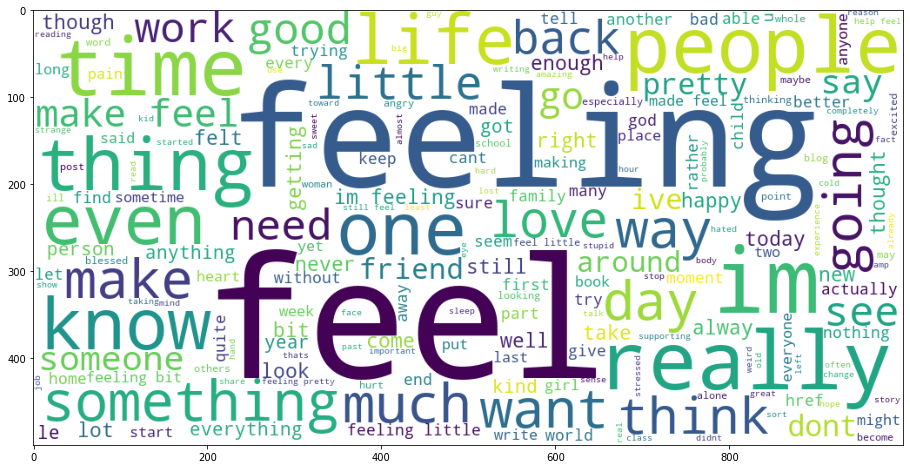

In [16]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [24]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.label

In [23]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000, 1500],
             'max_depth': [5, 10, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]}

In [19]:
rfc = RandomForestClassifier(max_features='auto',
                                      max_depth=None,
                                      n_estimators=500,
                                      min_samples_split=5,
                                      min_samples_leaf=1,
                                      bootstrap=True)
rfc.fit(X,y)

RandomForestClassifier(min_samples_split=5, n_estimators=500)

In [25]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [26]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    expression_check(prediction)

In [27]:
input1 = ["Ear buds or cushions are oval and it's quite uncomfortable. Beside it seemed like a used product . The product I received was different from the one shown in the pic . Its not circle which makes it uncomfortable. I will exchange and write a feedback again. Thanks."]
input2 = ["Shoe was good in quality. Shoe Sole crack & pulled out after 3 month of used."]

In [28]:
sentiment_predictor(input1)
sentiment_predictor(input2)


Input statement has Negative Sentiment.
Input statement has Positive Sentiment.


In [33]:
import pickle
pickle. dump(rfc, open('emotion_model.h5', 'wb'))

In [52]:
from selectorlib import Extractor
import requests 
import json 
from time import sleep
import csv
from dateutil import parser as dateparser

In [53]:
url  = "https://www.amazon.in/Nike-Chroma-Chrome-Flops-Sandals/product-reviews/B07P9599JD/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [54]:
# Create an Extractor by reading from the YAML file
e = Extractor.from_yaml_file('selectors.yml')

def scrape(url):    
    
    r = requests.get(url)
    
    return e.extract(r.text)


content  = scrape(url)
print(content)

{'product_title': 'Nike Men Flip Flops Thong Sandals', 'reviews': [{'title': 'Quality is good. But The Advice that i would like to ...', 'content': 'Product is 100 percent genuine as i have cross check with Nike Store. Quality is good. But The Advice that i would like to give Amazon, that They  should give some some Brand genuinity proof with there product, So Customer would Blindly Trust on product 😊', 'date': 'Reviewed in India on 15 January 2018', 'variant': 'Size: 10 UK (10.5 US) Color Name: Sequoia/DKStucco-DKStucco', 'images': None, 'verified': 'Verified Purchase', 'author': 'Rohit Haryan', 'rating': '4.0 out of 5 stars'}, {'title': 'Choose cloudtail company', 'content': "I doesn't expect original for 730rs..but I got original chroma thong 5.. I appreciate cloudtail company.. If you need to buy Nike chroma thong 5 better to choose cloudtail company.. Thank you sir.. I love it, colour as expected and size some fit after using it may become loose.. No doubt it was original.. Thank 

In [55]:
content

{'product_title': 'Nike Men Flip Flops Thong Sandals',
 'reviews': [{'title': 'Quality is good. But The Advice that i would like to ...',
   'content': 'Product is 100 percent genuine as i have cross check with Nike Store. Quality is good. But The Advice that i would like to give Amazon, that They  should give some some Brand genuinity proof with there product, So Customer would Blindly Trust on product 😊',
   'date': 'Reviewed in India on 15 January 2018',
   'variant': 'Size: 10 UK (10.5 US) Color Name: Sequoia/DKStucco-DKStucco',
   'images': None,
   'verified': 'Verified Purchase',
   'author': 'Rohit Haryan',
   'rating': '4.0 out of 5 stars'},
  {'title': 'Choose cloudtail company',
   'content': "I doesn't expect original for 730rs..but I got original chroma thong 5.. I appreciate cloudtail company.. If you need to buy Nike chroma thong 5 better to choose cloudtail company.. Thank you sir.. I love it, colour as expected and size some fit after using it may become loose.. No dou

In [77]:
content.get('reviews')[0].get('title')

'Quality is good. But The Advice that i would like to ...'

In [76]:
sentiment_predictor([content.get('reviews')[0].get('title')])

Input statement has Positive Sentiment.


In [79]:
content.get('reviews')

[{'title': 'Quality is good. But The Advice that i would like to ...',
  'content': 'Product is 100 percent genuine as i have cross check with Nike Store. Quality is good. But The Advice that i would like to give Amazon, that They  should give some some Brand genuinity proof with there product, So Customer would Blindly Trust on product 😊',
  'date': 'Reviewed in India on 15 January 2018',
  'variant': 'Size: 10 UK (10.5 US) Color Name: Sequoia/DKStucco-DKStucco',
  'images': None,
  'verified': 'Verified Purchase',
  'author': 'Rohit Haryan',
  'rating': '4.0 out of 5 stars'},
 {'title': 'Choose cloudtail company',
  'content': "I doesn't expect original for 730rs..but I got original chroma thong 5.. I appreciate cloudtail company.. If you need to buy Nike chroma thong 5 better to choose cloudtail company.. Thank you sir.. I love it, colour as expected and size some fit after using it may become loose.. No doubt it was original.. Thank you cloudtail. Pvt ltd",
  'date': 'Reviewed in I

In [86]:
reviews = content.get('reviews')
for review in reviews:
    print(review.get('content'))
    title  = str(review.get('content'))
    
    sentiment_predictor([title])

Product is 100 percent genuine as i have cross check with Nike Store. Quality is good. But The Advice that i would like to give Amazon, that They  should give some some Brand genuinity proof with there product, So Customer would Blindly Trust on product 😊
Input statement has Positive Sentiment.
I doesn't expect original for 730rs..but I got original chroma thong 5.. I appreciate cloudtail company.. If you need to buy Nike chroma thong 5 better to choose cloudtail company.. Thank you sir.. I love it, colour as expected and size some fit after using it may become loose.. No doubt it was original.. Thank you cloudtail. Pvt ltd
Input statement has Positive Sentiment.
Genuine product Worthy to buy
Input statement has Negative Sentiment.
1.  The delivered nike flip flop is extremely good item, there is no crack in this item. 2.  Rs 799 is totally worth for this item. 3.  Every inchs have the good finishing. 4.  Am completely satisfied. Delivery -  4.5/5 Package -  5/5 Thanks to Amazon
Input 

In [31]:
import pickle 
vec_file = 'vectorizer.pickle'
pickle.dump(cv, open(vec_file, 'wb'))